In [11]:
#load all necessary libraries
import pandas as pd 
import numpy as np 
import scipy as scp
import seaborn as sns
import random
import sklearn
#import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

df_test = pd.read_excel('data/data_w_origin/origins.xlsx')
df_test.head()

,جنس,مقطع,دوره,معدل كل,فرصت مطالعاتی بین المللی,حذف ترم,مرخصی,دين,وضعيت تاهل,تعداد فرزند,سن,استان محل تولد,تحت پوشش كميته امداد
0,مرد,دكتري تخصصي PhD,روزانه,14.86,ندارد,ندارد,ندارد,اسلام,مجرد,0,30,قوم فارس,خير
1,مرد,دكتري تخصصي PhD,شهریه پرداز,16.04,ندارد,ندارد,ندارد,اسلام,متاهل,1,39,قوم کرد,خير
2,زن,دكتري تخصصي PhD,روزانه,14.51,ندارد,ندارد,ندارد,اسلام,مجرد,0,30,قوم مازنی,خير
3,مرد,دكتري تخصصي PhD,شهریه پرداز,17.92,ندارد,ندارد,ندارد,اسلام,متاهل,0,32,قوم کرد,خير
4,زن,دكتري تخصصي PhD,روزانه,17.51,ندارد,ندارد,ندارد,اسلام,متاهل,2,37,قوم عرب,خير


قوم فارس     4637
قوم ترک       743
قوم مازنی     316
قوم عرب       280
قوم گیلک      216
قوم لر        211
قوم کرد       199
999           181
قوم ترکمن      70
قوم بلوچ       23
Name: استان محل تولد, dtype: int64


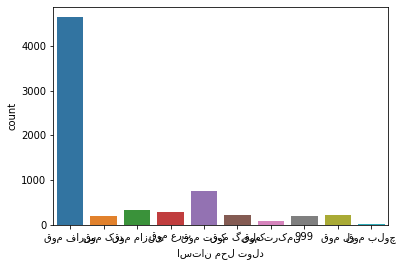

In [14]:
sns.countplot(x='استان محل تولد', data=df_test)
print(df_test['استان محل تولد'].value_counts())

In [3]:
import pandas as pd

# create a sample data frame
df = pd.DataFrame({
    'Column1': ['A', 'B', 'C', 'A'],
    'Column2': ['X', 'Y', 'X', 'Z'],
    'Column3': ['Yes', 'No', 'Yes', 'Yes']
})
print(df)
# create a dictionary to map unique values to numbers
mapping_dict = {}
for col in df.columns:
    unique_values = df[col].unique()
    mapping_dict[col] = {value: i for i, value in enumerate(unique_values)}

# replace values in data frame with mapped values
df.replace(mapping_dict, inplace=True)

print(df)


  Column1 Column2 Column3
0       A       X     Yes
1       B       Y      No
2       C       X     Yes
3       A       Z     Yes
   Column1  Column2  Column3
0        0        0        0
1        1        1        1
2        2        0        0
3        0        2        0


In [4]:
# create a dictionary to map unique values to numbers
mapping_dict = {}
variables = list(set(df_test.columns) - {"ID", "Sen", "Moadel", "Farzandan", "Sal"})
for col in variables:
    unique_values = df_test[col].unique()
    mapping_dict[col] = {value: i for i, value in enumerate(unique_values)}

# replace values in data frame with mapped values
df_test.replace(mapping_dict, inplace=True)
df_test.head()

,جنس,مقطع,دوره,معدل كل,فرصت مطالعاتی بین المللی,حذف ترم,مرخصی,دين,وضعيت تاهل,تعداد فرزند,سن,استان محل تولد,تحت پوشش كميته امداد
0,0,0,0,0.0,0,0,0,0,0,0,0,0,0
1,0,0,1,1.0,0,0,0,0,1,1,1,1,0
2,1,0,0,2.0,0,0,0,0,0,0,0,2,0
3,0,0,1,3.0,0,0,0,0,1,0,2,1,0
4,1,0,0,4.0,0,0,0,0,1,2,3,3,0


<Axes: >

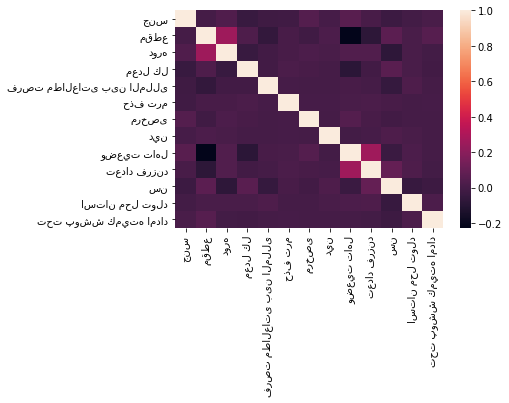

In [5]:
sns.heatmap(df_test.corr(), annot=False)

In [6]:
df_test.dropna(inplace=True)
df_test.isna().sum()

جنس                         0
مقطع                        0
دوره                        0
معدل كل                     0
فرصت مطالعاتی بین المللی    0
حذف ترم                     0
مرخصی                       0
دين                         0
وضعيت تاهل                  0
تعداد فرزند                 0
سن                          0
استان محل تولد              0
تحت پوشش كميته امداد        0
dtype: int64

In [8]:
df_test.columns

Index(['جنس', 'مقطع', 'دوره', 'معدل كل', 'فرصت مطالعاتی بین المللی', 'حذف ترم',
       'مرخصی', 'دين', 'وضعيت تاهل', 'تعداد فرزند', 'سن', 'استان محل تولد',
       'تحت پوشش كميته امداد'],
      dtype='object')

In [9]:
X = df_test.drop(['استان محل تولد'], axis=1) 
y = df_test['استان محل تولد']
#y=y.astype('object')

print("Columns for training:", list(X.columns.values)) 

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

model1 = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg').fit(X_train, y_train)
preds = model1.predict(X_test)

#print the tunable parameters (They were not tuned in this example, everything kept as default)
params = model1.get_params()
print(params)

#Print model parameters
#print('Intercept: \n', model1.intercept_)
#print('Coefficients: \n', model1.coef_)

#Create a confusion matrix
#y_test as first argument and the preds as second argument 
confusion_matrix(y_test, preds)

#transform confusion matrix into array
#the matrix is stored in a vaiable called confmtrx
confmtrx = np.array(confusion_matrix(y_test, preds))

#Accuracy statistics

print('Accuracy Score:', metrics.accuracy_score(y_test, preds))  

#Create classification report
class_report=classification_report(y_test, preds)
print(class_report)

Columns for training: ['جنس', 'مقطع', 'دوره', 'معدل كل', 'فرصت مطالعاتی بین المللی', 'حذف ترم', 'مرخصی', 'دين', 'وضعيت تاهل', 'تعداد فرزند', 'سن', 'تحت پوشش كميته امداد']
(5500, 12)
(1376, 12)
(5500,)
(1376,)
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'none', 'random_state': 0, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy Score: 0.6598837209302325
              precision    recall  f1-score   support

           0       0.66      1.00      0.80       910
           1       0.00      0.00      0.00        35
           2       0.00      0.00      0.00        59
           3       0.00      0.00      0.00        48
           4       0.00      0.00      0.00       173
           5       0.00      0.00      0.00        56
           6       0.00      0.00      0.00        13
           7       0.00      0.00   

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Version

In [177]:
from sklearn.tree import DecisionTreeClassifier

X = df_test.drop(['Leave', 'Remove', 'newClass', 'Tasmim', 'ID'], axis=1) 
y = df_test['newClass']
#y=y.astype('object')

print("Columns for training:", list(X.columns.values)) 

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

Columns for training: ['Boomi', 'Sen', 'Maghtah', 'Moadel', 'Doreh', 'Meliyat', 'Vaziyattahol', 'Farzandan', 'Sal', 'Komakmali', 'Jensiyat']
(2723, 11)
(681, 11)
(2723,)
(681,)
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       676
       Leave       0.00      0.00      0.00         2
      Remove       0.00      0.00      0.00         3

    accuracy                           0.99       681
   macro avg       0.33      0.33      0.33       681
weighted avg       0.99      0.99      0.99       681

[[673   2   1]
 [  2   0   0]
 [  3   0   0]]


Columns for training: ['Boomi', 'Sen', 'Maghtah', 'Doreh', 'Meliyat', 'Vaziyattahol', 'Farzandan', 'Komakmali', 'Jensiyat', 'Leave', 'Remove']


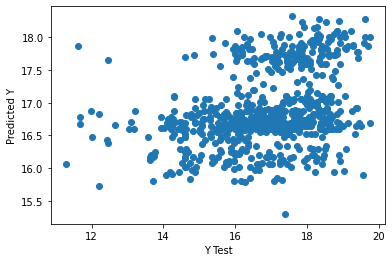

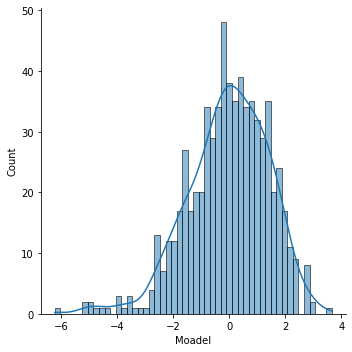

In [178]:
X = df_test.drop(['newClass', 'ID', 'Sal', 'Tasmim','Moadel'], axis=1) 
#X = df_test[['Leave', 'Remove']]
y = df_test['Moadel']
#y=y.astype('object')

print("Columns for training:", list(X.columns.values)) 

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20, random_state = 5)
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
#plt.plot(y_test,y_test,'r')

sns.displot((y_test-predictions),bins=50, kde=True);

In [179]:
coeff_df = pd.DataFrame(lm.coef_,index=X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Boomi,0.140288
Sen,-1.385269
Maghtah,-1.260935
Doreh,-0.536000
Meliyat,-0.767138
Vaziyattahol,-0.023706
Farzandan,0.691198
Komakmali,0.289787
Jensiyat,0.271232
Leave,0.231680


In [180]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.1246044942196982
MSE: 2.0668972105627903
RMSE: 1.4376707587493007


In [181]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400, verbose=False)

<AxesSubplot:>

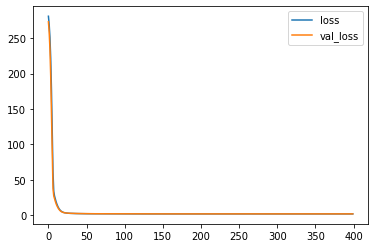

In [182]:
losses = pd.DataFrame(model.history.history)
losses.plot()

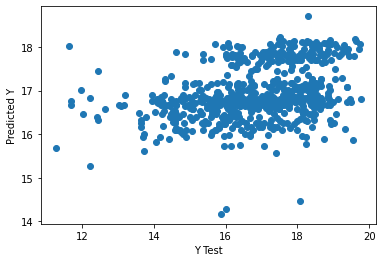

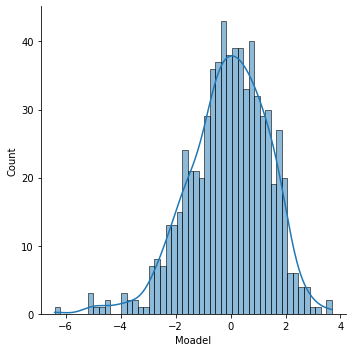

In [190]:
predictions = model.predict(X_test)
predictions = predictions.reshape(predictions.shape[0])
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
#plt.plot(y_test,y_test,'r')
sns.displot((y_test-predictions),bins=50, kde=True);

<AxesSubplot:>

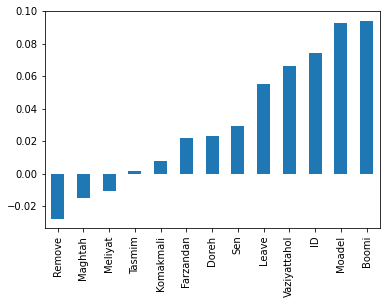

In [192]:
df_test.corr()['Jensiyat'].sort_values()[:-1].plot(kind='bar')

In [193]:
X = df_test.drop(['newClass', 'ID', 'Sal', 'Tasmim','Jensiyat'], axis=1) 
y = df_test['Jensiyat']
#y=y.astype('object')

print("Columns for training:", list(X.columns.values)) 

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
preds = logmodel.predict(X_test)

#print the tunable parameters (They were not tuned in this example, everything kept as default)
params = model1.get_params()
print(params)

#Print model parameters
#print('Intercept: \n', model1.intercept_)
#print('Coefficients: \n', model1.coef_)

#Create a confusion matrix
#y_test as first argument and the preds as second argument 
confusion_matrix(y_test, preds)

#transform confusion matrix into array
#the matrix is stored in a vaiable called confmtrx
confmtrx = np.array(confusion_matrix(y_test, preds))

#Accuracy statistics

print('Accuracy Score:', metrics.accuracy_score(y_test, preds))  

#Create classification report
class_report=classification_report(y_test, preds)
print(class_report)

print(logmodel.score(X_test, y_test))
print(logmodel.score(X_train, y_train))

Columns for training: ['Boomi', 'Sen', 'Maghtah', 'Moadel', 'Doreh', 'Meliyat', 'Vaziyattahol', 'Farzandan', 'Komakmali', 'Leave', 'Remove']
(2723, 11)
(681, 11)
(2723,)
(681,)
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'none', 'random_state': 0, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy Score: 0.6886930983847284
              precision    recall  f1-score   support

           0       0.69      1.00      0.81       468
           1       0.60      0.01      0.03       213

    accuracy                           0.69       681
   macro avg       0.64      0.50      0.42       681
weighted avg       0.66      0.69      0.57       681

0.6886930983847284
0.7029012118986412


In [198]:
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(20, activation='relu'))
model.add(Dense(15, activation='relu'))
# Binary classification
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
model.fit(x=X_train, y=y_train, epochs=300, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])
#model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), verbose=1)

Epoch 1/300
86/86 [==============================] - 1s 3ms/step - loss: 0.8673 - accuracy: 0.7014 - val_loss: 0.6223 - val_accuracy: 0.6902
Epoch 2/300
86/86 [==============================] - 0s 1ms/step - loss: 0.6084 - accuracy: 0.7025 - val_loss: 0.6195 - val_accuracy: 0.6887
Epoch 3/300
86/86 [==============================] - 0s 1ms/step - loss: 0.6076 - accuracy: 0.7011 - val_loss: 0.6192 - val_accuracy: 0.6902
Epoch 4/300
86/86 [==============================] - 0s 1ms/step - loss: 0.6057 - accuracy: 0.7022 - val_loss: 0.6189 - val_accuracy: 0.6916
Epoch 5/300
86/86 [==============================] - 0s 1ms/step - loss: 0.6047 - accuracy: 0.7018 - val_loss: 0.6181 - val_accuracy: 0.6872
Epoch 6/300
86/86 [==============================] - 0s 1ms/step - loss: 0.6046 - accuracy: 0.7022 - val_loss: 0.6333 - val_accuracy: 0.6902
Epoch 7/300
86/86 [==============================] - 0s 1ms/step - loss: 0.6071 - accuracy: 0.7018 - val_loss: 0.6194 - val_accuracy: 0.6902
Epoch 8/300
8

<AxesSubplot:>

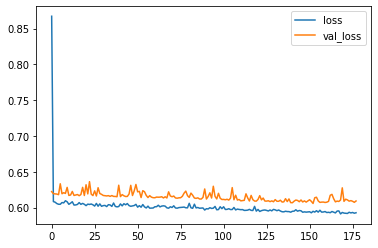

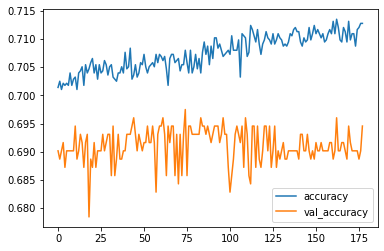

In [199]:
model_loss = pd.DataFrame(model.history.history)
loss = model_loss[['loss', 'val_loss']]
acc = model_loss[['accuracy', 'val_accuracy']]
loss.plot()
acc.plot()

In [200]:
predictions = model.predict_classes(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.70      0.98      0.81       468
           1       0.60      0.07      0.13       213

    accuracy                           0.69       681
   macro avg       0.65      0.52      0.47       681
weighted avg       0.67      0.69      0.60       681

[[458  10]
 [198  15]]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  'will be removed after 2021-01-01. '


In [201]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       468
           1       0.40      0.39      0.40       213

    accuracy                           0.63       681
   macro avg       0.56      0.56      0.56       681
weighted avg       0.63      0.63      0.63       681

[[343 125]
 [129  84]]
              precision    recall  f1-score   support

           0       0.72      0.80      0.76       468
           1       0.41      0.31      0.36       213

    accuracy                           0.65       681
   macro avg       0.57      0.56      0.56       681
weighted avg       0.62      0.65      0.63       681

[[373  95]
 [146  67]]
